In [5]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01


In [10]:
import geopandas as gpd
import geodatasets
import contextily as cx

In [11]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

/var/folders/3g/2pn9j21s1xj7ftm38ntxpt2m0000gn/T/ipykernel_2553/4025383553.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
france = world.loc[world['name'] == 'France'] # get France row
boundaries = france['geometry'] # get France geometry
print(france)
print(boundaries)

       pop_est continent    name iso_a3  gdp_md_est  \
43  67059887.0    Europe  France    FRA     2715518   

                                             geometry  
43  MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
43    MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...
Name: geometry, dtype: geometry


/var/folders/3g/2pn9j21s1xj7ftm38ntxpt2m0000gn/T/ipykernel_2553/2354488674.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


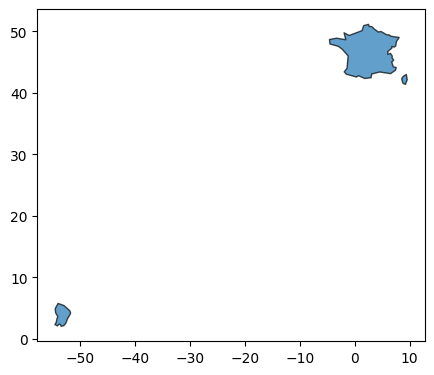

In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
france = world.loc[world['name'] == 'France']
ax = france.plot(figsize=(5, 5), alpha=0.7, edgecolor="k")



In [32]:
print(world)

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

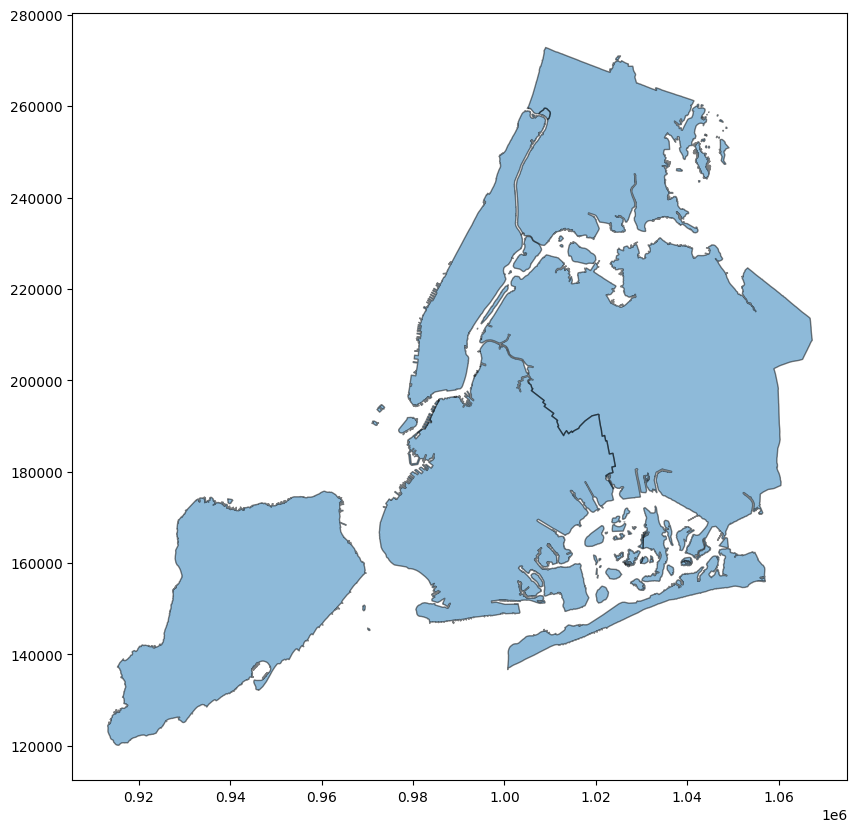

In [37]:
df = geopandas.read_file(geodatasets.get_path("nybb"))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")

In [38]:
df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [41]:
df_wm = df.to_crs(epsg=3857)